In [1]:
import numpy as np
from test import test
from util import exponential_decay, inverse_decay, tanh_decay
import matplotlib.pyplot as plt
import visualize
from stats import *

In [2]:
topics = np.array([[-1, 1]])

In [3]:
varied_param = 'consumer_topic_interest_func'
varied_param_legend_label = 'Consumer Interest Function Shallowness'
varied_param_x_label = 'Consumer Interest Function Shallowness'

In [4]:
num_influencers = 1
num_agents = 8

function_mults = list(np.linspace(0.1, 3, 10))
functions = []
def get_fun(mult):
    return lambda x: inverse_decay(x, mult, 2)
for mult in function_mults:
    functions.append(get_fun(mult))

varied_param_values = function_mults

In [5]:
perfect_info_stats, imperfect_info_stats = test(
    topics=topics,
    varied_param=varied_param,
    num_influencers=num_influencers,
    num_agents=num_agents,
    producer_topic_interest_func=lambda x: inverse_decay(x, 1, 2),
    consumer_topic_interest_func=functions,
    consumer_attention_bound=10,
    consumer_external_interest_prob=3,
    consumer_delay_sensitivity=1,
    influencer_attention_bound=20,
    influencer_delay_sensitivity=1,
    init_following_rates_method='equal',
    init_interest_method='even',
    production_rate=1,
    external_production_rate=1,
    use_imperfect_information=True,
)

Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing influencer 8
Optimizing producer 0
Optimization succeeded (overall 0.0038023340166546404s): nit=5, nfev=14, njev=7.
Optimizing producer 1
Optimization succeeded (overall 0.004336083016823977s): nit=5, nfev=16, njev=8.
Optimizing producer 2
Optimization succeeded (overall 0.0037648750003427267s): nit=5, nfev=14, njev=7.
Optimizing producer 3
Optimization succeeded (overall 0.0036838329979218543s): nit=5, nfev=14, njev=7.
Optimizing producer 4
Optimization succeeded (overall 0.004137708019698039s): nit=5, nfev=16, njev=8.
Optimizing producer 5
Optimization succeeded (overall 0.0041621669952291995s): nit=5, nfev=16, njev=8.
Optimizing producer 6
Optimization succeeded (overall 0.003635000000940636s): nit=5, nfev=14, njev=7.
Optimizing producer 7
Optimization succeeded (overall 0.004107166983885691s): nit=

In [6]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/Users/gabeguralnick/git/content-market-experiment/visualize.py'>

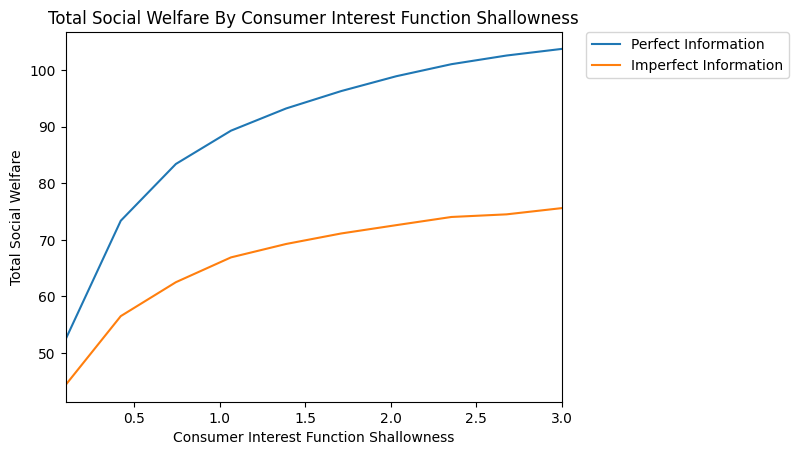

In [7]:
visualize.plot_ending_value_by_test(f"Total Social Welfare By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'total_social_welfare', varied_param_values, varied_param_x_label, 'Total Social Welfare')

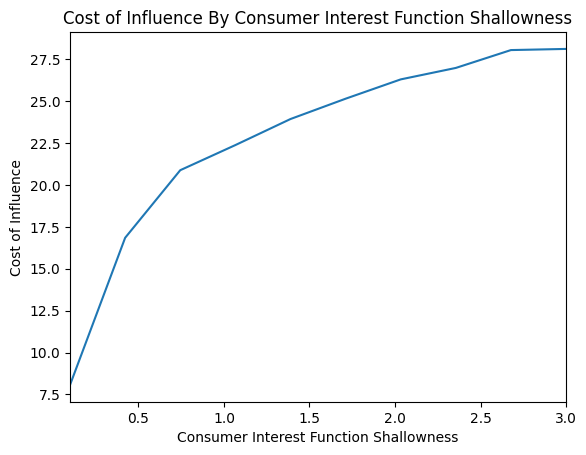

In [8]:
visualize.plot_cost_of_influence_by_test(f"Cost of Influence By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, varied_param_values, varied_param_x_label, 'Cost of Influence')

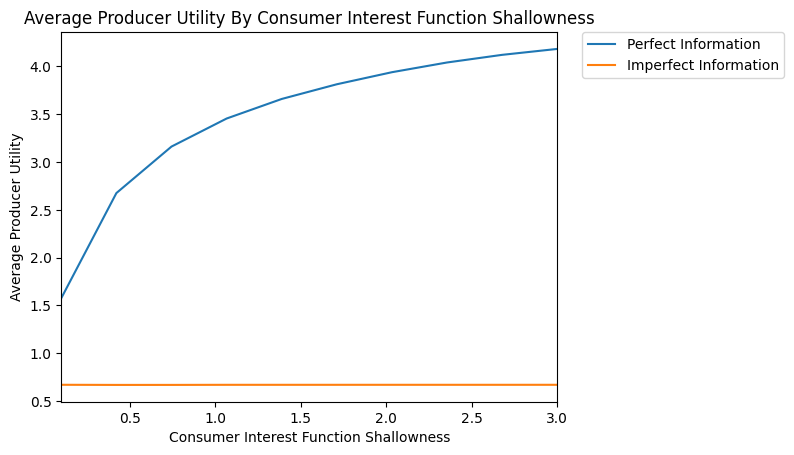

In [12]:
visualize.plot_ending_value_by_test(f"Average Producer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_producer_utility', varied_param_values, varied_param_x_label, 'Average Producer Utility')

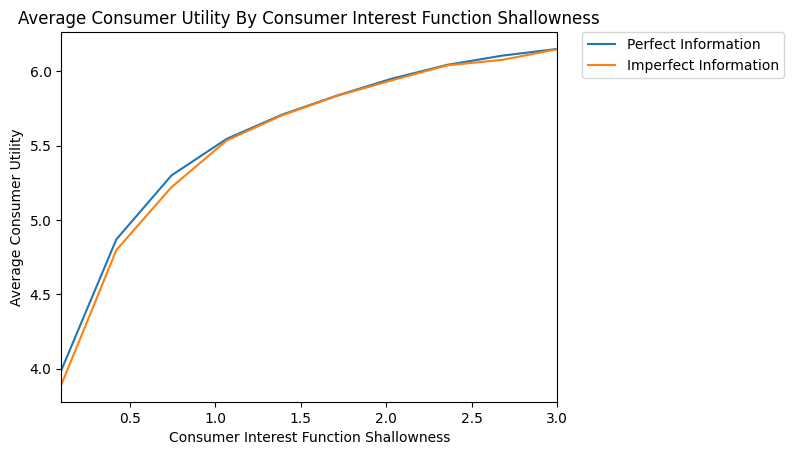

In [13]:
visualize.plot_ending_value_by_test(f"Average Consumer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_consumer_utility', varied_param_values, varied_param_x_label, 'Average Consumer Utility')

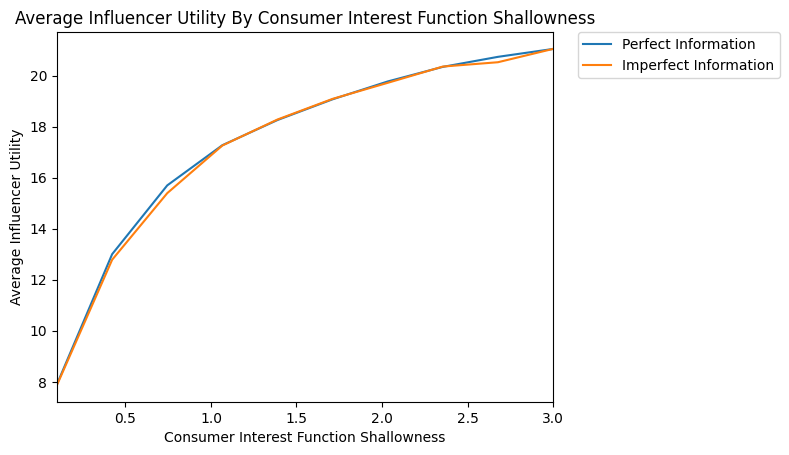

In [14]:
visualize.plot_ending_value_by_test(f"Average Influencer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_utility', varied_param_values, varied_param_x_label, 'Average Influencer Utility')

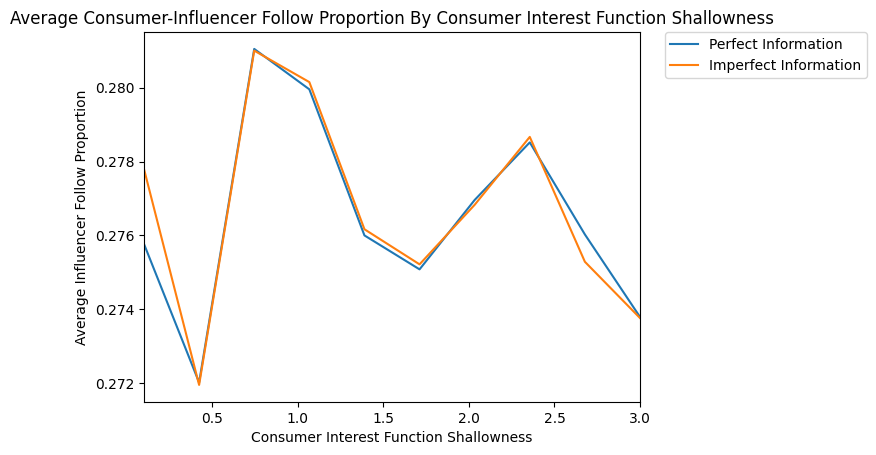

In [15]:
visualize.plot_ending_value_by_test(f"Average Consumer-Influencer Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_follow_proportion', varied_param_values, varied_param_x_label, 'Average Influencer Follow Proportion')

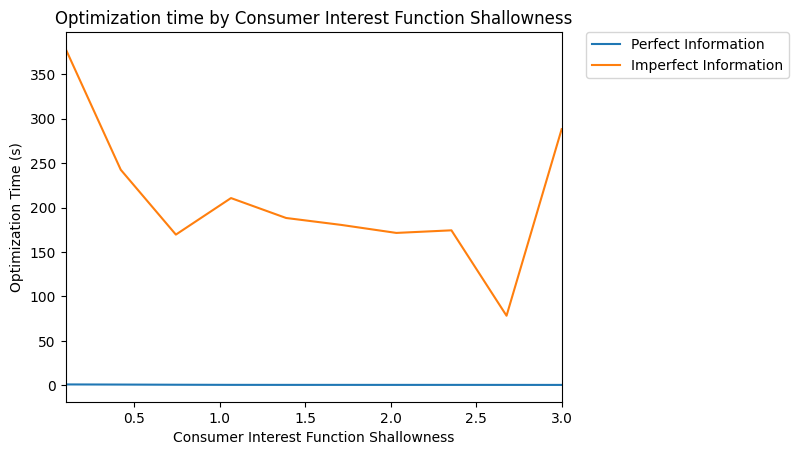

In [16]:
visualize.plot_value_by_test(f"Optimization time by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'optimization_time', varied_param_values, varied_param_x_label, 'Optimization Time (s)')

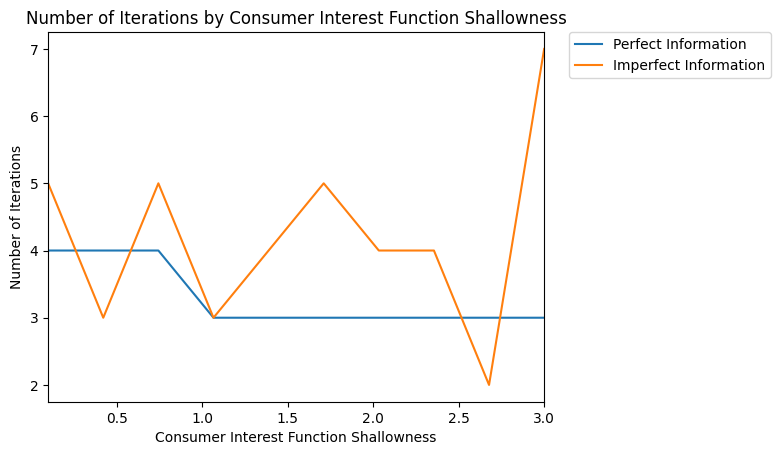

In [17]:
visualize.plot_value_by_test(f"Number of Iterations by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'num_iterations', varied_param_values, varied_param_x_label, 'Number of Iterations')

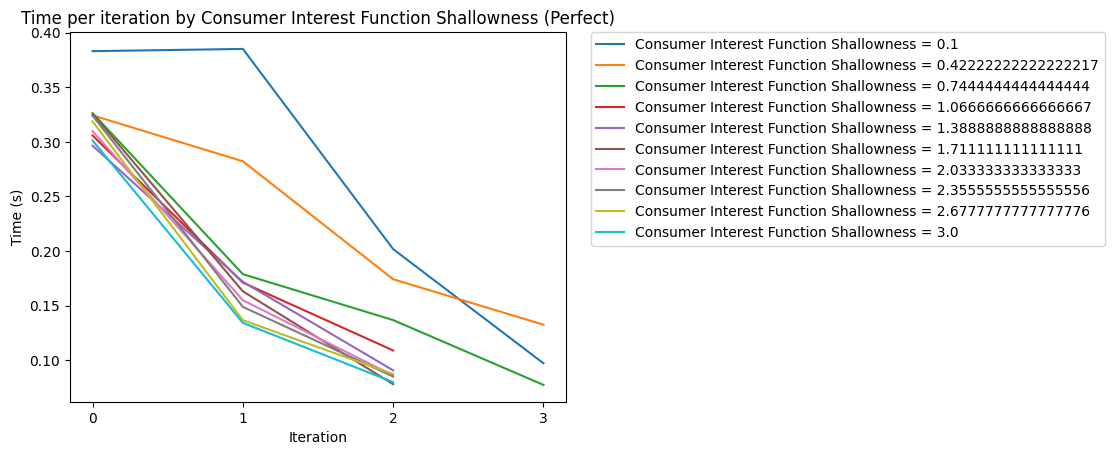

In [18]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Perfect)", perfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

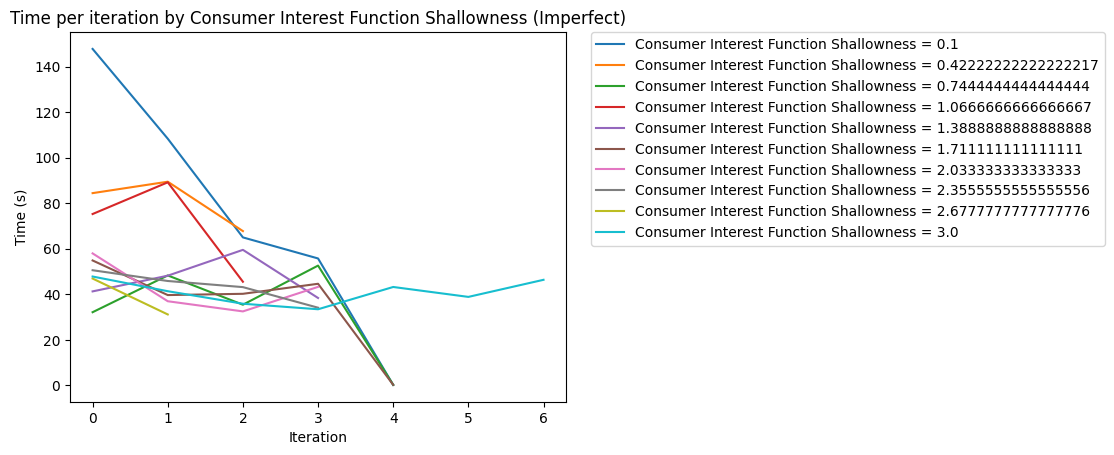

In [19]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Imperfect)", imperfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

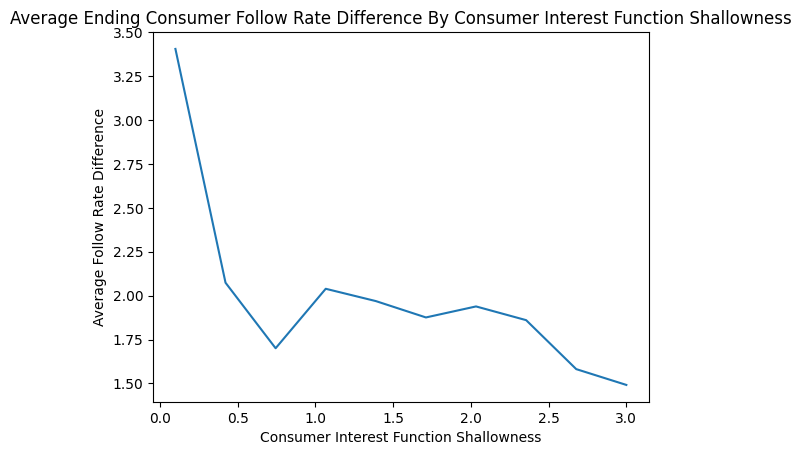

In [20]:
avg_follow_rate_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_follow_rate_diff = 0

    for index in perfect_stat.consumer_stats:
        perfect_consumer_stat = perfect_stat.consumer_stats[index]
        imperfect_consumer_stat = imperfect_stat.consumer_stats[index]

        ending_follow_rate_diff = np.linalg.norm(perfect_consumer_stat.following_rates[-1] - imperfect_consumer_stat.following_rates[-1])
        avg_follow_rate_diff += ending_follow_rate_diff
    
    avg_follow_rate_diff /= len(perfect_stat.consumer_stats)
    avg_follow_rate_diffs.append(avg_follow_rate_diff)

plt.figure()
plt.title(f"Average Ending Consumer Follow Rate Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Follow Rate Difference")
plt.plot(varied_param_values, avg_follow_rate_diffs)
plt.show()

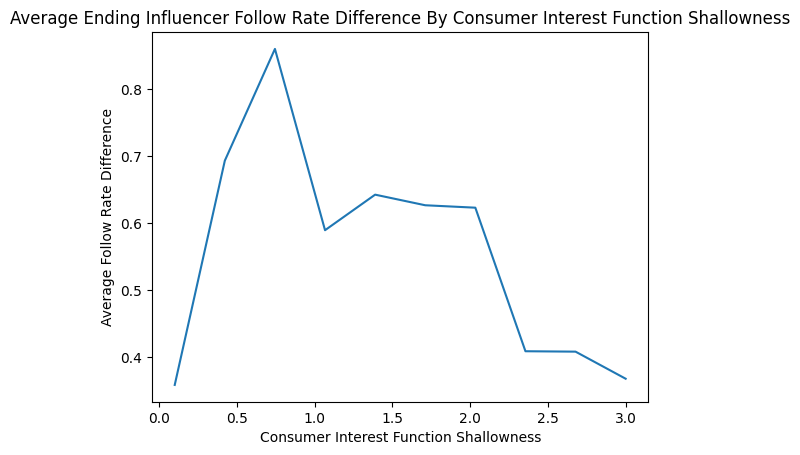

In [21]:
avg_follow_rate_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_follow_rate_diff = 0

    for index in perfect_stat.influencer_stats:
        perfect_influencer_stat = perfect_stat.influencer_stats[index]
        imperfect_influencer_stat = imperfect_stat.influencer_stats[index]

        ending_follow_rate_diff = np.linalg.norm(perfect_influencer_stat.following_rates[-1] - imperfect_influencer_stat.following_rates[-1])
        avg_follow_rate_diff += ending_follow_rate_diff
    
    avg_follow_rate_diff /= len(perfect_stat.influencer_stats)
    avg_follow_rate_diffs.append(avg_follow_rate_diff)

plt.figure()
plt.title(f"Average Ending Influencer Follow Rate Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Follow Rate Difference")
plt.plot(varied_param_values, avg_follow_rate_diffs)
plt.show()

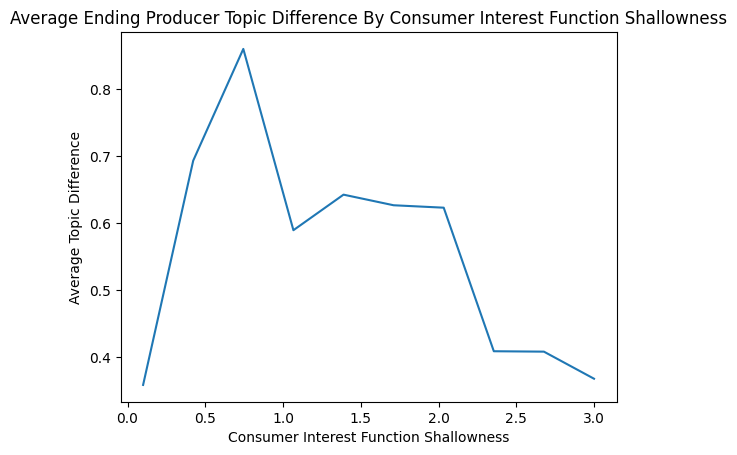

In [24]:
avg_topic_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_topic_diff = 0

    for index in perfect_stat.producer_stats:
        perfect_producer_stat = perfect_stat.producer_stats[index]
        imperfect_producer_stat = imperfect_stat.producer_stats[index]

        ending_topic_diff = np.linalg.norm(perfect_producer_stat.topics[-1] - imperfect_producer_stat.topics[-1])
        avg_topic_diff += ending_topic_diff
    
    avg_topic_diff /= len(perfect_stat.producer_stats)
    avg_topic_diffs.append(avg_topic_diff)

plt.figure()
plt.title(f"Average Ending Producer Topic Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Topic Difference")
plt.plot(varied_param_values, avg_follow_rate_diffs)
plt.show()

In [22]:
for stat in perfect_info_stats:
    print(stat.to_dict())

{'num_iterations': 4, 'total_consumer_utility': [0, 30.959557313291334, 31.874795700072625, 31.914665542790623, 31.916038532285125], 'total_producer_utility': [0, 11.681311574592069, 12.465288995280625, 12.619796662468973, 12.608583733245604], 'total_influencer_utility': [0, 7.600792425455399, 7.92025776169459, 7.9066719825549505, 7.910349080322755], 'total_social_welfare': [0, 50.241661313338795, 52.26034245704784, 52.44113418781454, 52.434971345853484], 'average_consumer_rate_change': [0, 4.525103148060456, 1.5329927679697106, 0.2923468914783719, 0.04654161296586436], 'average_producer_topic_change': [0, 0.36091993620064444, 0.08750157806069024, 0.015648871082543737, 0.0027915503672433367], 'average_influencer_rate_change': [0, 0.9262802097769176, 0.7799125452833476, 0.06469430096790336, 0.0], 'average_consumer_utility_change': [0, 3.869944664161417, 0.11440479834766165, 0.004983730339749914, 0.0001716236868125609], 'average_producer_utility_change': [0, 1.4601639468240086, 0.0979971

In [23]:
for stat in imperfect_info_stats:
    print(stat.to_dict())

{'num_iterations': 5, 'total_consumer_utility': [0, 30.50345002121398, 31.026927724645233, 31.11314985551326, 31.129429801830675, 31.129429801830675], 'total_producer_utility': [0, 5.360867372474245, 5.360279762507509, 5.360514825227401, 5.360514825227401, 5.360514825227401], 'total_influencer_utility': [0, 7.317804125007746, 7.804041158540645, 7.864278142346367, 7.877496027751657, 7.877496027751657], 'total_social_welfare': [0, 43.18212151869597, 44.19124864569339, 44.337942823087026, 44.367440654809734, 44.367440654809734], 'average_consumer_rate_change': [0, 4.525103109634834, 1.3758916802256687, 0.16242255058235605, 0.1476606205573408, 0.0], 'average_producer_topic_change': [0, 0.37726084581493236, 0.020979108340941015, 0.012552183364997084, 9.168671945265251e-05, 0.0], 'average_influencer_rate_change': [0, 0.926285090059047, 0.8669459641169639, 0.050663788443095784, 0.023391392475239445, 0.0], 'average_consumer_utility_change': [0, 3.812931252651748, 0.06543471292890635, 0.0107777